# DBSCAN

- 노이즈가있는 애플리케이션의 밀도 기반 공간 클러스터링   

- 고밀도의 핵심 샘플을 찾아서 클러스터를 확장합니다. 밀도가 비슷한 클러스터를 포함하는 데이터에 적합합니다.  

### Toy Data 생성
- outlier가 있는 data points를 생성하고 DBSCAN 알고리즘이 outlier를 실제로 검출하는지 test

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
data = df.iloc[:, 0:4]
target = df.iloc[:, 4]
data.shape, target.shape

((150, 4), (150,))

- Data 시각화

In [52]:
list(set(iris.target))

[0, 1, 2]

In [53]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

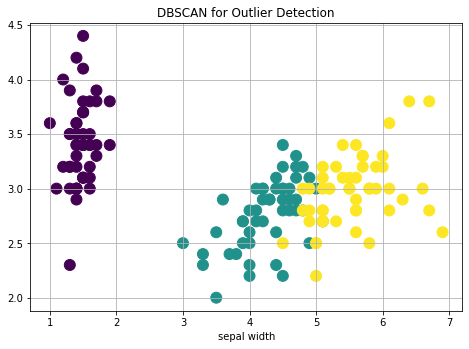

In [60]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1.0, 1.0])
colors = iris.target
ax.scatter(data.iloc[:, 2], data.iloc[:, 1], c=colors, s=120)
ax.set_xlabel('petal length')
ax.set_xlabel('sepal width')
ax.set_title('DBSCAN for Outlier Detection')
ax.grid()

### DBSCAN model 학습  
```
DBSCAN(eps=epsilon, min_samples=minimumSamples)
```
- eps : 이웃으로 간주될 최대 거리 (Radius). 가장 중요한 DBSCAN 매개 변수.
- min_samples : 코어 포인트로 간주될 포인트에 대한 이웃의 minimum 샘플 수(포인트 자체 포함)
    
    
- core_sample_indices : core sample 의 index  
- labels_ : 데이터 세트의 각 point에 대한 클러스터 레이블. outlier 에는 -1 이 지정.

In [15]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
model.get_params()

{'algorithm': 'auto',
 'eps': 0.8,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 19,
 'n_jobs': None,
 'p': None}

In [18]:
print(model.labels_)
print(Counter(model.labels_))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Counter({1: 94, 0: 50, -1: 6})


In [20]:
outliers_df = pd.DataFrame(data)
outliers_df[model.labels_ == -1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,5.1,2.5,3.0,1.1
105,7.6,3.0,6.6,2.1
117,7.7,3.8,6.7,2.2
118,7.7,2.6,6.9,2.3
122,7.7,2.8,6.7,2.0
131,7.9,3.8,6.4,2.0


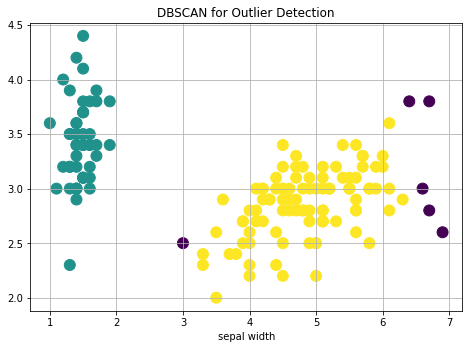

In [40]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1.0, 1.0])
colors = model.labels_
ax.scatter(data.iloc[:, 2], data.iloc[:, 1], c=colors, s=120)
ax.set_xlabel('petal length')
ax.set_xlabel('sepal width')
ax.set_title('DBSCAN for Outlier Detection')
ax.grid()

In [83]:
print("전체 sample size :", len(iris.target))
print()
print("core sample들의 size / index :")
print(len(model.core_sample_indices_), model.core_sample_indices_)
print()
outlier_indices = outliers_df[model.labels_ == -1].index.values
print("outlier의 size / index :")
print(len(outlier_indices), outlier_indices)
print()
border_indices = [idx for idx in range(150) if idx not in model.core_sample_indices_ and idx not in outlier_indices]
print("border sample들의 size / index :")
print(len(border_indices), border_indices)

전체 sample size : 150

core sample들의 size / index :
114 [  0   1   2   3   4   5   6   7   8   9  10  11  12  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39
  40  42  43  44  45  46  47  48  49  51  53  54  55  56  58  59  61  63
  65  66  67  69  70  71  72  73  74  75  76  77  78  80  81  82  83  84
  85  86  88  89  90  91  92  94  95  96  97  99 101 102 103 104 110 111
 112 115 116 120 123 124 126 127 128 132 133 136 137 138 139 140 142 143
 144 145 146 147 148 149]

outlier의 size / index :
6 [ 98 105 117 118 122 131]

border sample들의 size / index :
30 [13, 14, 15, 33, 41, 50, 52, 57, 60, 62, 64, 68, 79, 87, 93, 100, 106, 107, 108, 109, 113, 114, 119, 121, 125, 129, 130, 134, 135, 141]
